In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,cohen_kappa_score,roc_curve,roc_auc_score,classification_report,confusion_matrix,recall_score

In [2]:
pd.set_option("display.max_column",30)
pd.set_option("display.max_rows",1000)
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Basic information about the data

In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There is no missing value

# Splitting the Data into Dependent and Independent variable

In [8]:
for i in range(10):    
    df=df.sample(frac=1)

In [9]:
x=df.drop(columns="y")
y=df["y"]

In [10]:
y.replace({'yes':1,"no":0},inplace=True)

In [11]:
y.value_counts(normalize=True)*100

0    88.734583
1    11.265417
Name: y, dtype: float64

As the Response variable is imbalanced, So shuffling the data for 10 times.

# Splitting the data into Categorical and Continuous variable

In [12]:
categorical=x.select_dtypes(include="object")

In [13]:
numerical=x.select_dtypes(include=["int64","float64"])

In [14]:
categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
32226,technician,single,university.degree,no,no,no,cellular,may,fri,nonexistent
11655,technician,married,basic.9y,unknown,yes,yes,telephone,jun,fri,nonexistent
6193,admin.,married,high.school,no,no,no,telephone,may,tue,nonexistent
7274,blue-collar,married,professional.course,no,no,no,telephone,may,thu,nonexistent
22900,blue-collar,married,basic.6y,no,yes,no,cellular,aug,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
34350,blue-collar,single,basic.9y,no,no,yes,cellular,may,thu,failure
22365,admin.,divorced,university.degree,no,yes,no,cellular,aug,thu,nonexistent
36483,admin.,single,high.school,no,no,no,cellular,jun,wed,nonexistent
12987,admin.,single,professional.course,no,no,yes,cellular,jul,tue,nonexistent


In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [16]:
categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
32226,technician,single,university.degree,no,no,no,cellular,may,fri,nonexistent
11655,technician,married,basic.9y,unknown,yes,yes,telephone,jun,fri,nonexistent
6193,admin.,married,high.school,no,no,no,telephone,may,tue,nonexistent
7274,blue-collar,married,professional.course,no,no,no,telephone,may,thu,nonexistent
22900,blue-collar,married,basic.6y,no,yes,no,cellular,aug,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
34350,blue-collar,single,basic.9y,no,no,yes,cellular,may,thu,failure
22365,admin.,divorced,university.degree,no,yes,no,cellular,aug,thu,nonexistent
36483,admin.,single,high.school,no,no,no,cellular,jun,wed,nonexistent
12987,admin.,single,professional.course,no,no,yes,cellular,jul,tue,nonexistent


In [17]:
numerical

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32226,45,763,1,999,0,-1.8,92.893,-46.2,1.313,5099.1
11655,43,818,2,999,0,1.4,94.465,-41.8,4.959,5228.1
6193,22,240,2,999,0,1.1,93.994,-36.4,4.857,5191.0
7274,41,53,3,999,0,1.1,93.994,-36.4,4.860,5191.0
22900,53,64,5,999,0,1.4,93.444,-36.1,4.965,5228.1
...,...,...,...,...,...,...,...,...,...,...
34350,24,51,1,999,1,-1.8,92.893,-46.2,1.266,5099.1
22365,50,129,3,999,0,1.4,93.444,-36.1,4.963,5228.1
36483,28,198,1,999,0,-2.9,92.963,-40.8,1.260,5076.2
12987,27,518,2,999,0,1.4,93.918,-42.7,4.962,5228.1


In [18]:
continuous_data=numerical.loc[:,['age', 'duration','emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [19]:
continuous_data

,age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32226,45,763,-1.8,92.893,-46.2,1.313,5099.1
11655,43,818,1.4,94.465,-41.8,4.959,5228.1
6193,22,240,1.1,93.994,-36.4,4.857,5191.0
7274,41,53,1.1,93.994,-36.4,4.860,5191.0
22900,53,64,1.4,93.444,-36.1,4.965,5228.1
...,...,...,...,...,...,...,...
34350,24,51,-1.8,92.893,-46.2,1.266,5099.1
22365,50,129,1.4,93.444,-36.1,4.963,5228.1
36483,28,198,-2.9,92.963,-40.8,1.260,5076.2
12987,27,518,1.4,93.918,-42.7,4.962,5228.1


Descriptive statistics of continuous data

In [20]:
continuous_data.describe()

,age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
print('Age:\nMinimum age of the customer: ', continuous_data['age'].min())
print('Maximum age of the customer: ', continuous_data['age'].max())
print('\nCall Duration:\nMinimum duration on the call: ', continuous_data['duration'].min())
print('Maximum duration on the call: ', continuous_data['duration'].max())

Age:
Minimum age of the customer:  17
Maximum age of the customer:  98

Call Duration:
Minimum duration on the call:  0
Maximum duration on the call:  4918


# Inference on grouping the column

In [22]:
pd.DataFrame(df.groupby(["housing","loan","default","pdays","campaign","y"])["y"].size())

y
housing loan    default pdays campaign y      
no      no      no      0     1        0     1
                        1     1        0     5
                                       1     1
                              2        0     2
                                       1     1
                              4        1     1
                        2     1        0     6
                                       1     9
                              2        0     1
                                       1     2
                              7        0     1
                        3     1        0    23
                                       1    67
                              2        0    12
                                       1    32
                              3        0     2
                                       1    10
                              4        0     2
                              5        0     4
                                       1     1
                              6        0     1
                              8        0     1
                        4     1        0    11
                                       1     9
                              2        0     7
                                       1     7
                              3        0     2
                                       1     1
                              5        1     1
                        5     1        0     2
                                       1     7
                              2        0     2
                                       1     3
                              3        1     1
                        6     1        0    19
                                       1    51
                              2        0    10
                                       1    23
                              3        0     4
                                       1    19
                              4        0     4
                                       1     6
                              5        0     2
                                       1     3
                              6        1     3
                              7        0     1
                                       1     1
                              8        0     1
                        7     1        0     7
                                       1     8
                              2        0     2
                                       1     7
                              3        0     1
                                       1     2
                              7        0     1
                        8     1        0     1
                                       1     1
                              2        1     1
                        9     1        0     5
                                       1     7
                              2        0     4
                                       1     4
                              3        0     1
                                       1     2
                        10    1        1     3
                              2        0     2
                                       1     3
                              4        0     1
                              5        0     1
                                       1     1
                              8        0     1
                        11    1        0     3
                              2        0     2
                                       1     2
                        12    1        0     5
                                       1     7
                              2        0     4
                                       1     2
                              3        0     1
                              4        0     1
                                       1     1
                              6        0     1
                                       1     1
                        13    1        0     5
   

People who are not having any of the loan, were not contacted (pday : 999) the bank, and they had not invested in term deposit. It may be due to the bank contacted the customer less than 5 times during the campaign.
Bank contacted them for less than 5 times : 9464(customers)


People who are already having loan and paying their loan without fail(not an defaulter), were not contacted (pday : 999) the bank, and they had not invested in term deposit.
Bank contacted them for less than 5 times : 1484(customers)

People who are already having housing loan and paying their loan without fail(not an defaulter), were not contacted (pday : 999) the bank, and they had not invested in term deposit.
Bank contacted them for less than 5 times : 10642(customers)

People who are already having housing loan and paying their loan without fail(not an defaulter), were not contacted (pday : 999) the bank, and but still they had invested in term deposit.
Bank contacted them for less than 5 times : 1368(customers)

Clearly we can conclude that, people already having their loan, housing loan to pay and most of them are not an defaulter. They have not interested in term deposit or the bank contacted them less than 5 times.

In the next campaign the bank should approach the customer who were not having their loan and the bank should call them more than 5 times. So that there may be a chance the customer can invest in term deposit.

The bank should not try to approach the customer who were already having their housing loan.
88% of the customer already having their housing loan had not invested in term deposit.

In [23]:
pd.DataFrame(df.groupby(["previous","campaign","pdays","y"]).size())

0
previous campaign pdays y       
0        1        999   0  13300
                        1   1491
         2        999   0   8196
                        1    794
         3        999   0   4362
                        1    410
         4        999   0   2191
                        1    188
         5        999   0   1363
                        1     95
         6        999   0    812
                        1     60
         7        999   0    548
                        1     33
         8        999   0    352
                        1     16
         9        999   0    256
                        1     17
         10       999   0    209
                        1     10
         11       999   0    162
                        1     12
         12       999   0    120
                        1      3
         13       999   0     86
                        1      4
         14       999   0     68
                        1      1
         15       999   0     48
                        1      2
         16       999   0     50
         17       999   0     54
                        1      4
         18       999   0     33
         19       999   0     26
         20       999   0     30
         21       999   0     24
         22       999   0     17
         23       999   0     15
                        1      1
         24       999   0     15
         25       999   0      8
         26       999   0      8
         27       999   0     11
         28       999   0      8
         29       999   0     10
         30       999   0      7
         31       999   0      7
         32       999   0      4
         33       999   0      4
         34       999   0      3
         35       999   0      5
         37       999   0      1
         39       999   0      1
         40       999   0      2
         41       999   0      1
         42       999   0      2
         43       999   0      2
         56       999   0      1
1        1        0     0      2
                        1      4
                  1     0      8
                        1      2
                  2     0     18
                        1     13
                  3     0     39
                        1     91
                  4     0     18
                        1     16
                  5     0      7
                        1     11
                  6     0     37
                        1     72
                  7     0      4
                        1     12
                  8     0      1
                        1      2
                  9     0      8
                        1      6
                  10    0      7
                        1     11
                  11    0      8
                        1      4
                  12    0     14
                        1     11
                  13    0      4
                        1      7
                  14    0      2
                        1      7
                  15    0      2
                        1      4
                  16    0      2
                        1      2
                  17    0      1
                  18    1      1
                  22    0      1
                        1      1
                  999   0   1607
                        1    235
         2        1     0      4
                        1      2
                  2     0      1
                        1      7
                  3     0     29
                        1     47
                  4     0     15
                        1     17
                  5     0      2
                        1      4
                  6     0     22
                        1     39
                  7     0      1
                        1      6
                  8     0      2
                        1      2
                  9     0      1
                        1      5
                  10    0      4
                        1      6
                  11    0      3
     

The customer who were not previously contacted, they got contacted 56 times in the campaign.
Bank is focusing on the customer not previously contacted.

# Box plot and KDE plot for Continuous data

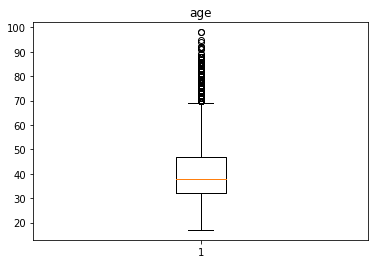

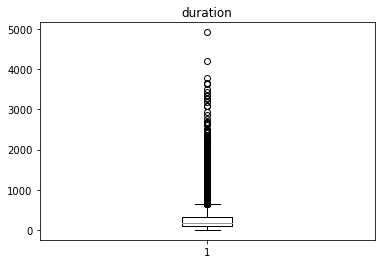

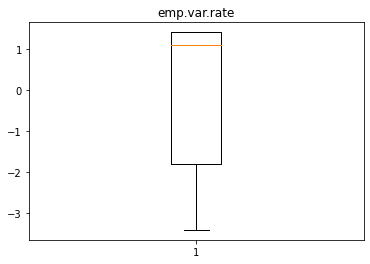

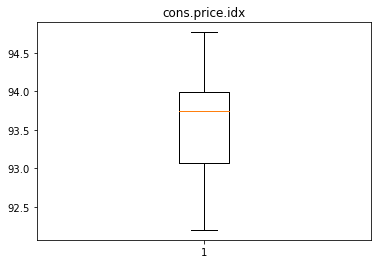

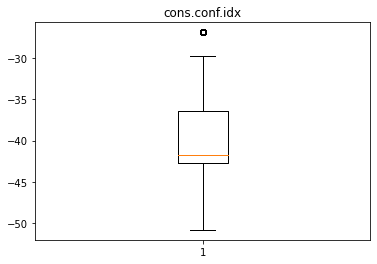

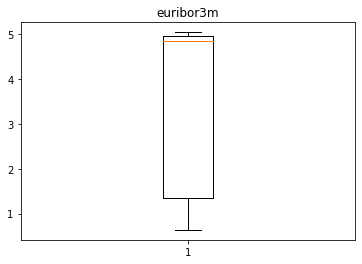

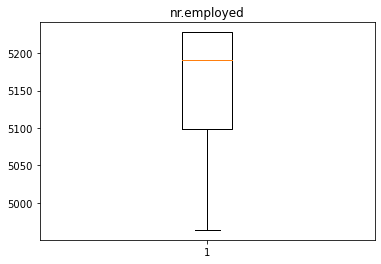

In [24]:
for i in continuous_data:    
    plt.boxplot(continuous_data[i])
    plt.title(i)
    plt.show()

Box plot shows that age and duration having more Outliers

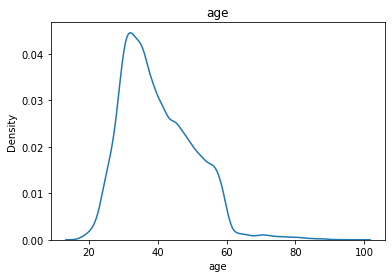

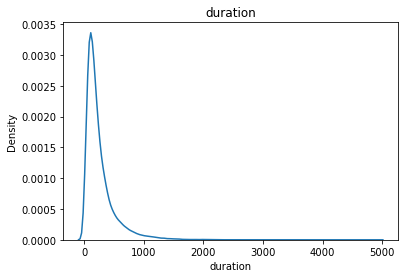

In [25]:
for i in continuous_data.columns[:2]:    
    sns.kdeplot(continuous_data[i])
    plt.title(i)
    plt.show()

As the above KDE plot clearly shows the age and duration is positively skewed

# Count plots and Bar plot for Categorical data

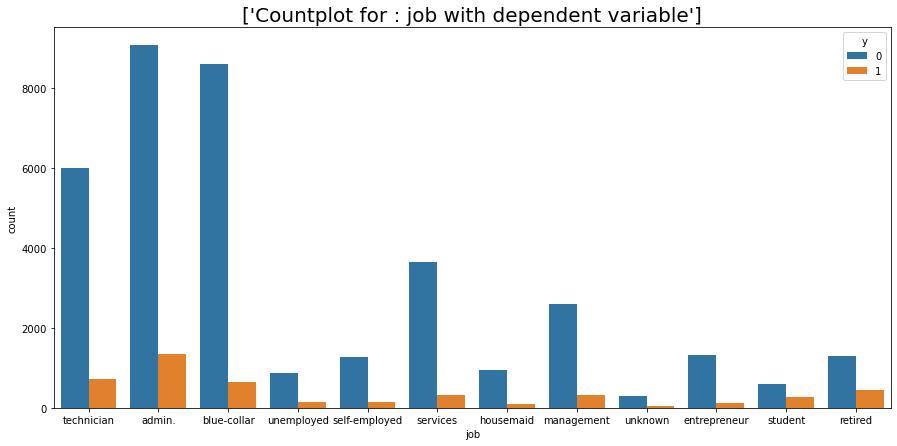

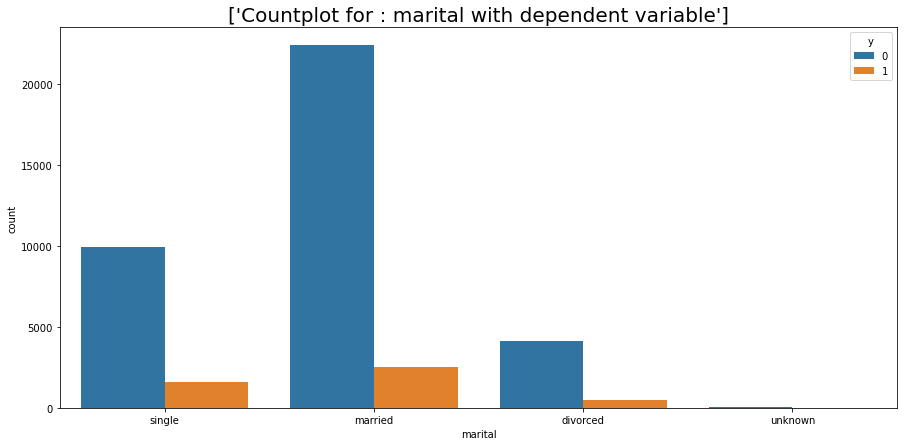

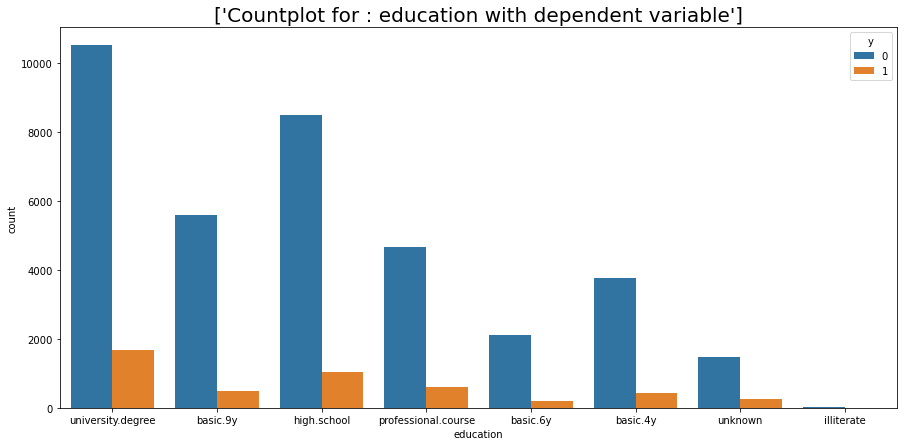

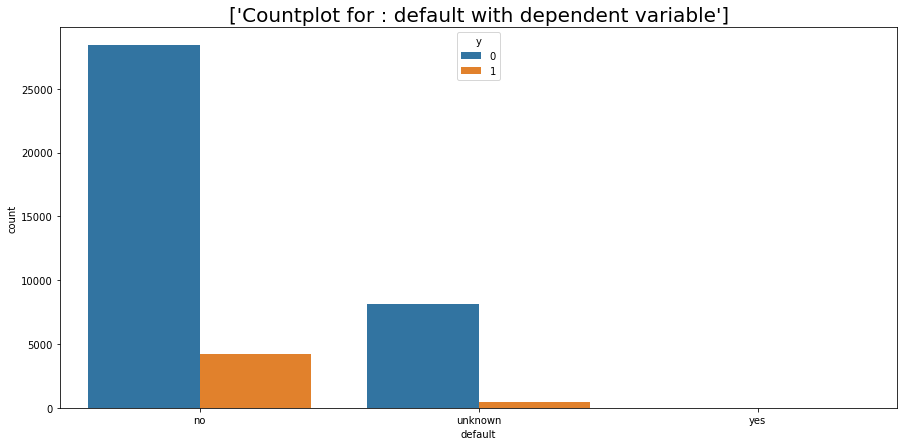

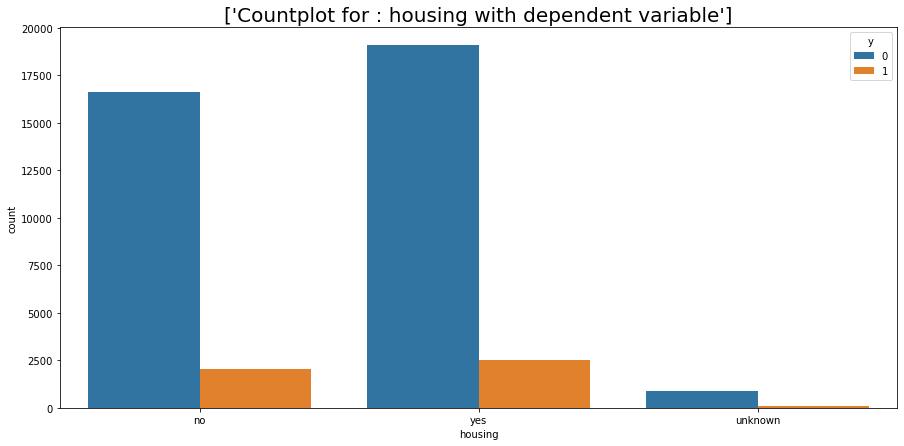

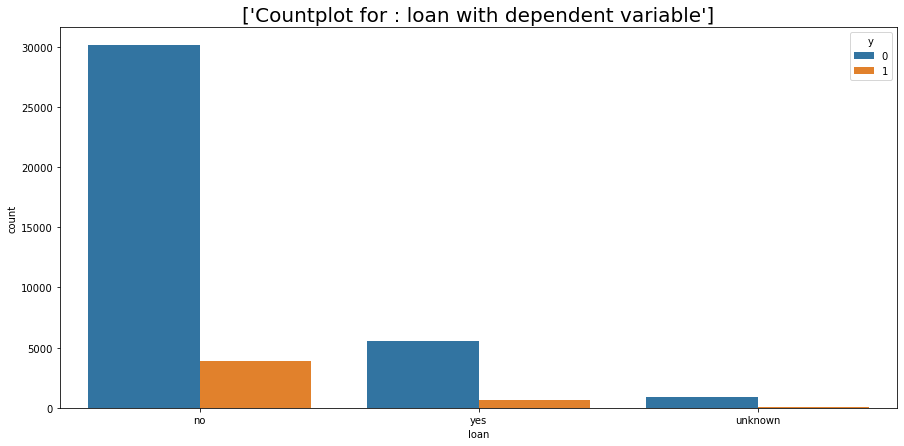

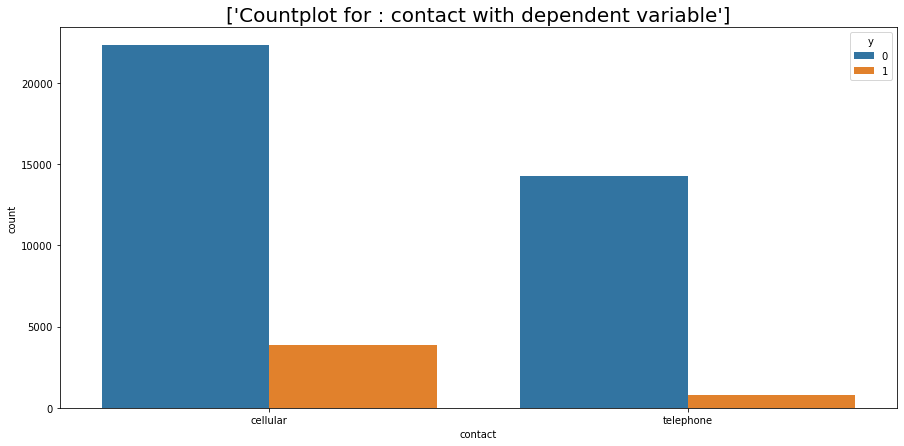

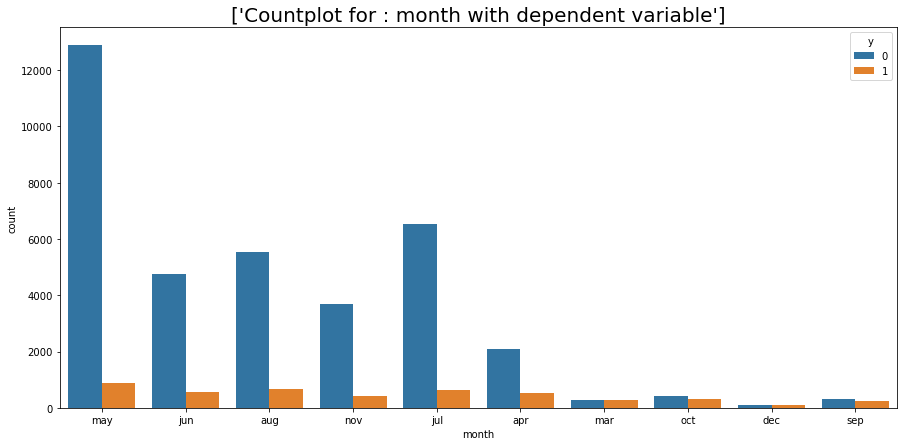

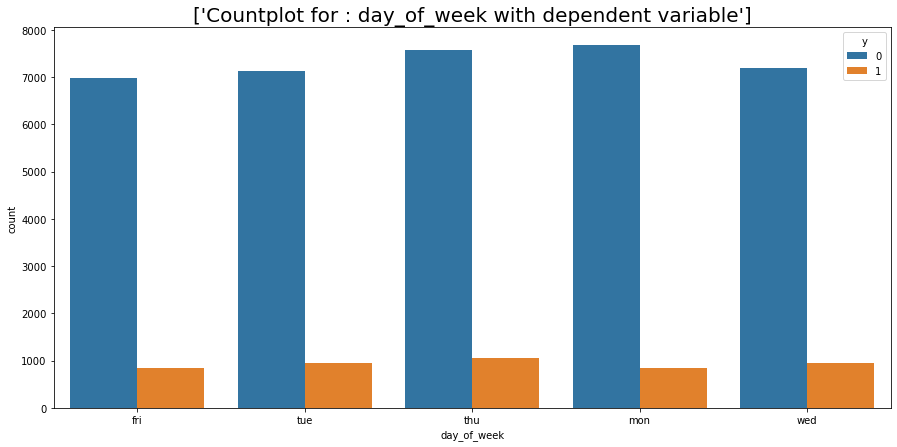

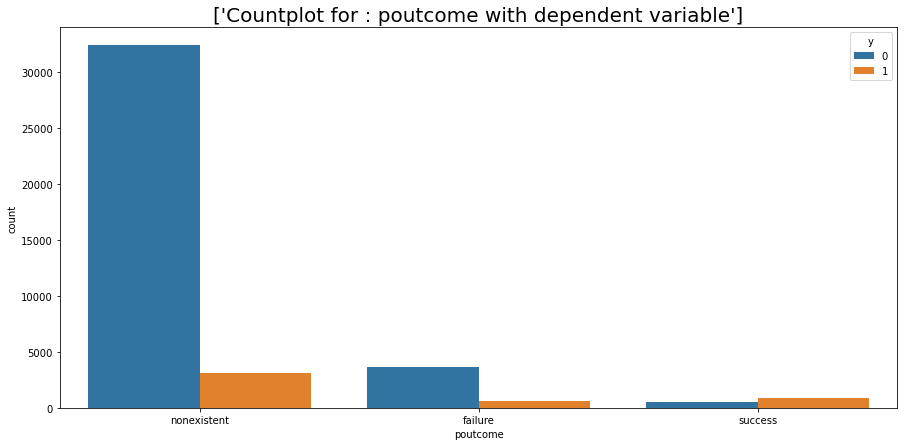

In [26]:
for i in categorical:
    plt.figure(figsize=(15,7))
    sns.countplot(categorical[i],hue=y)
    plt.title(["Countplot for : "+i+" with dependent variable"],size=20)

JOB:

In Job mostly admin,technician and blue_collar were contacted, but most of them were not subscribed. We can clearly see that bank is mostly approaching to these three category peoples. Retired peoples half of them were invested in term deposit.

MARITAL:

Mostly married peoples and singles were contacted, divorced were less contacted.

EDUCATION:

Most of the people were having University degree and highschooling. Most of them were not invested in term deposit

MONTH:

Campaign was held between March to December, but most of the peoples were contacted in the month of May,June,July,August

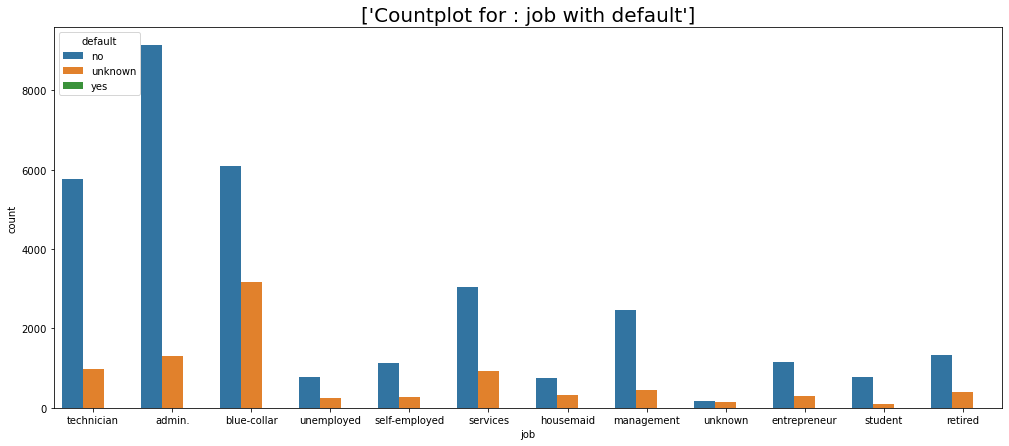

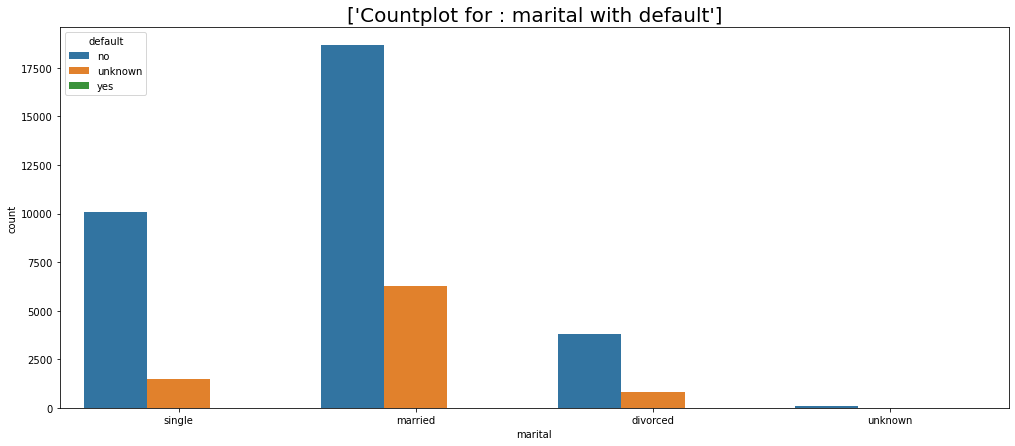

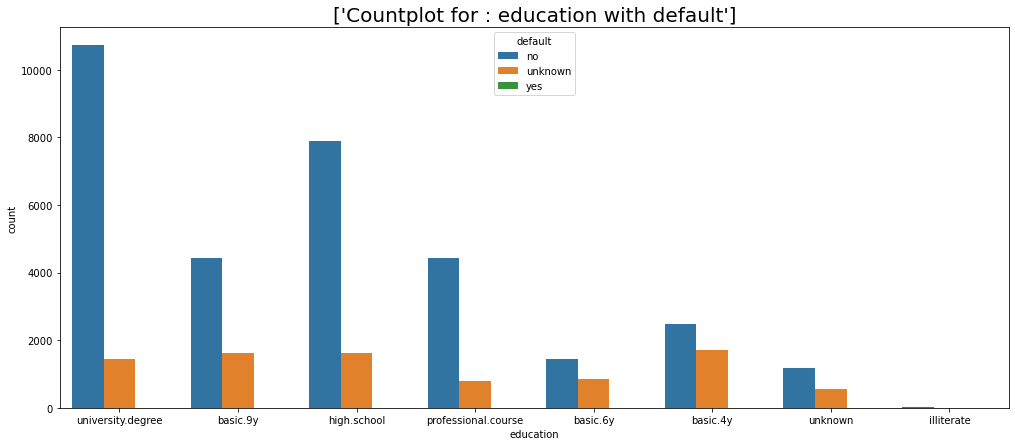

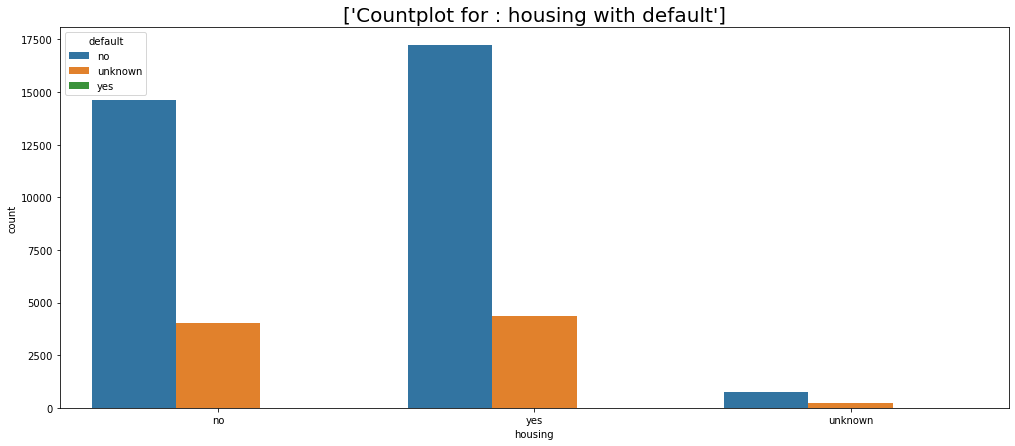

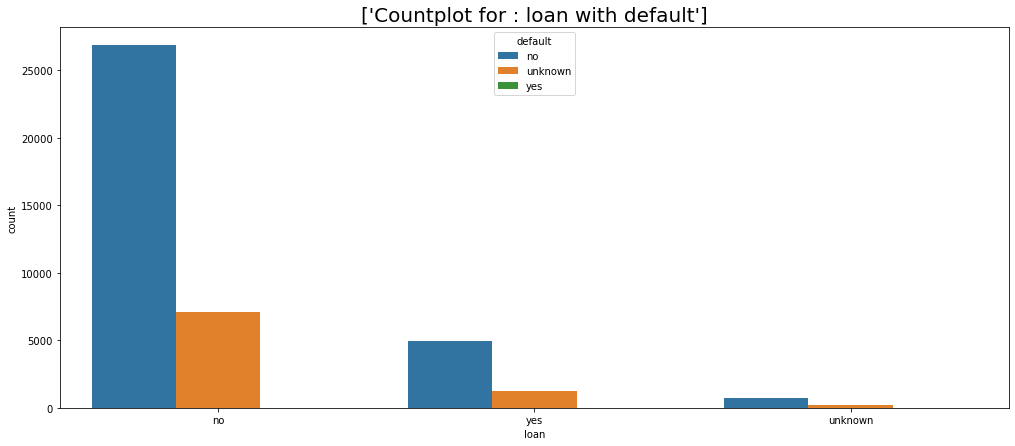

In [27]:
for i in categorical.columns:
    if i in ["job","marital","education","housing","loan"]:
        plt.figure(figsize=(17,7))
        sns.countplot(x=categorical[i],hue=categorical["default"])
        plt.title(["Countplot for : "+i+" with default"],size=20)

JOB:

Most of the customer having their profession in Admin,Services,Technician,Management are not an defaulter. Half of the customer in the Blue-collar profession are defaulter.

MARITAL:

Compared to married customer, single and divorced are less defaulters.

EDUCATION:

The customer having their education in University-degree,High-school,Professional-Course are mostly not defaulters.

HOUSING:

Comparitively the customer having their housing loan are most probably paid their loan(not an defaulter).

LOAN:

The customer having their loan mostly they are not defaulters.

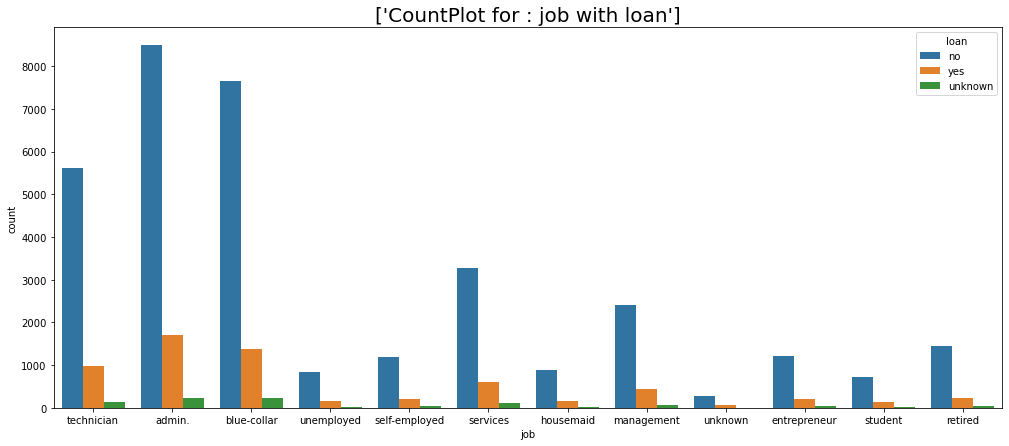

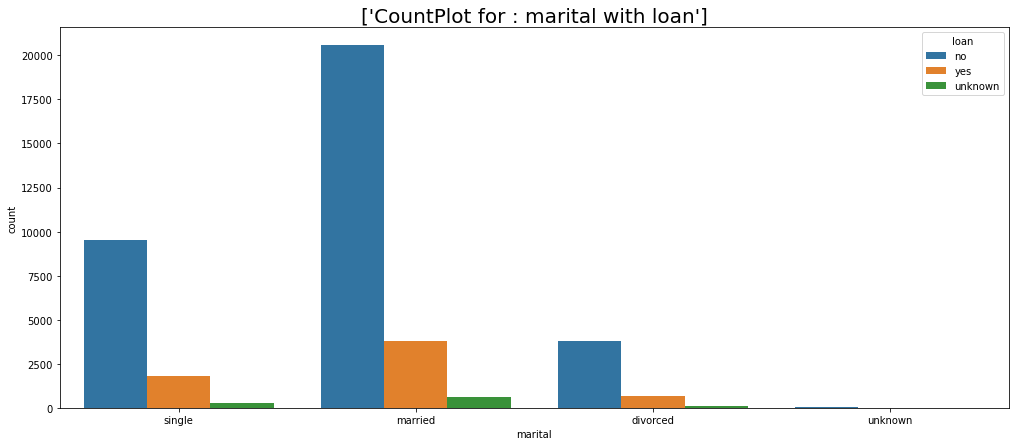

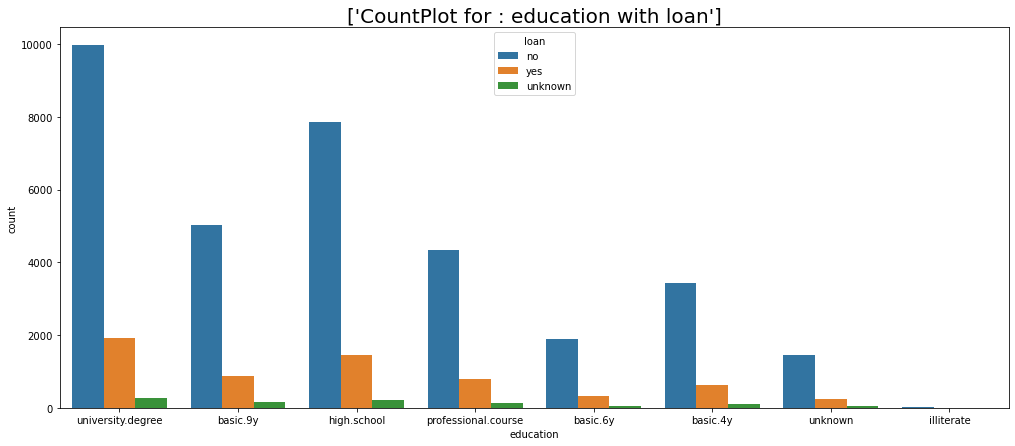

In [28]:
for i in categorical:
    if i in ["job","marital","education"]:
        plt.figure(figsize=(17,7))
        sns.countplot(x=categorical[i],hue=categorical["loan"])
        plt.title(["CountPlot for : "+i+" with loan"],size=20)

JOB:
    
In all the profession most of them are not having personal loan. As most of the customers are Admin,Technician and Blue-collar,
some of them are having personal loan.

MARITAL:

As most of them are married and single, some of them having loan. But most of them are not having loan.


EDUCATION:

Most of the customers are educated and mostly they are not having loans.


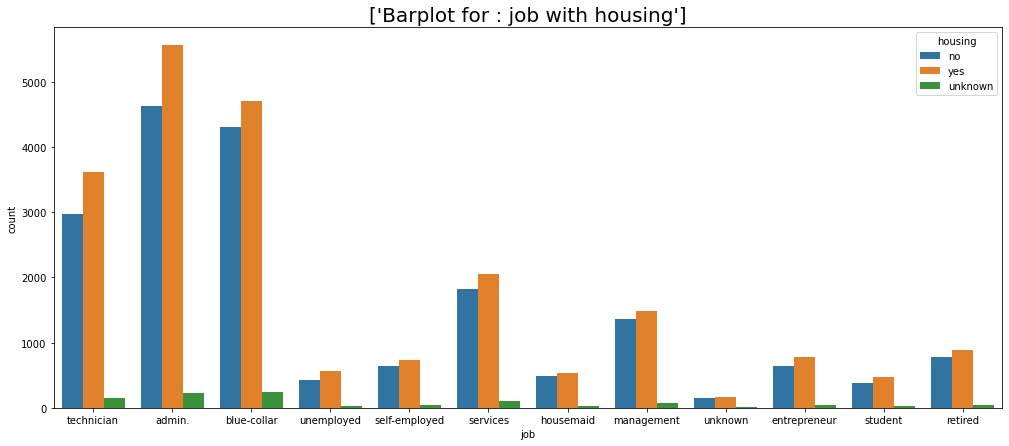

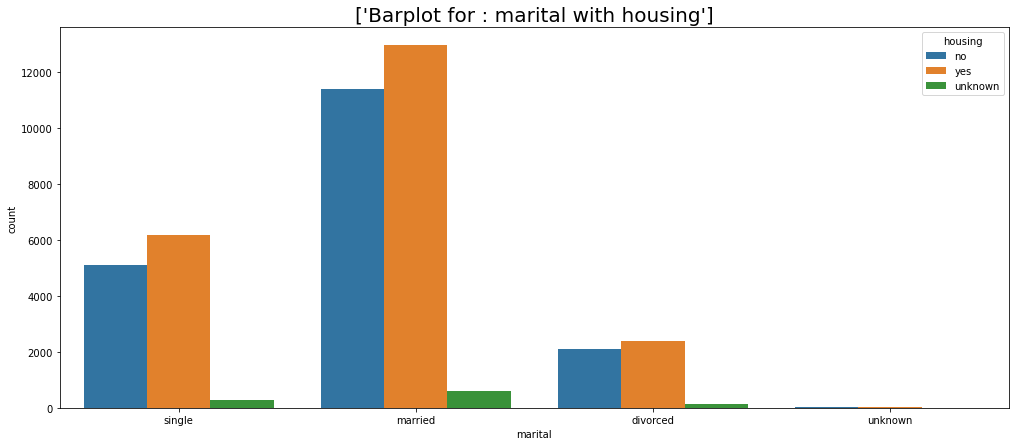

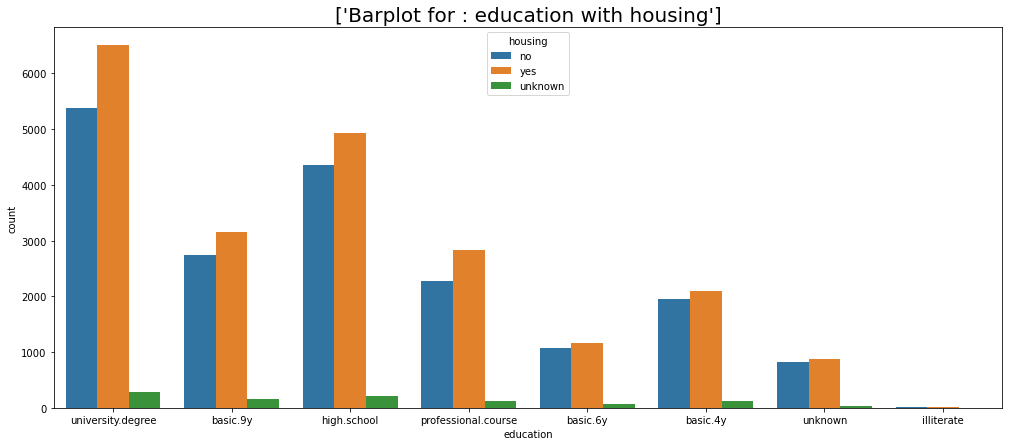

In [29]:
for i in categorical:
    if i in ["job","marital","education"]:
        plt.figure(figsize=(17,7))
        sns.countplot(x=categorical[i],hue=categorical["housing"])
        plt.title(["Barplot for : "+i+" with housing"],size=20)

JOB:

In all the profession mostly 90% of them are having Housing loan.

MARITAL:

In marital status single,married and divorced 90% of them are having Housing loan.

EDUCATION:

The customers who are well educated as well as not well educated, most of them are having Housing loans.

<AxesSubplot:xlabel='contact', ylabel='campaign'>

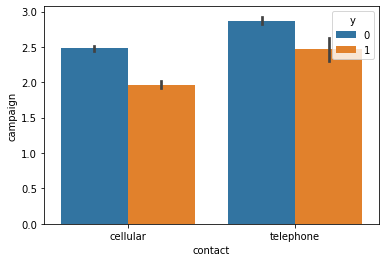

In [30]:
sns.barplot(df["contact"],df["campaign"],hue=y)

As per the above plot, we cannot say that the customer having cellular over telephone have invested in term deposit.

<AxesSubplot:xlabel='contact', ylabel='duration'>

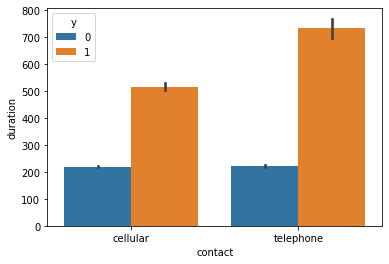

In [31]:
sns.barplot(df["contact"],df["duration"],hue=y)

But we can say that, customer having telephone had more call duration than cellular and most of the customer who had connected with the call for more duration had invested in term deposit.

# Insights from Visualization:

Most of the customer are having Housing loan compared to personal loan. And mostly they are not defaulters.

As the above plots show that, customer having their Housing loan had not invested in term deposit. So, it is preffered to contact the customers who is actually not having their housing loan in next campaign. 

As the pday column shows that, from the campaign most of the cutomers were not interested in term deposit and they had not contacted after the campaign.

It is suggested to bank to have call duration more than 500seconds, to get the customer invest on term deposit as per the above plots show.


# Outlier for continuous data

In [32]:
def outlier(x):
    a=[]
    empty=[]
    ind=[]
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    inner_fence=q1-(1.5*iqr)
    outer_fence=q3+(1.5*iqr)
    for index,i in enumerate(x):
        if (i<inner_fence or i>outer_fence):
            a.append(i)
            ind.append(index)
            
    if a==empty:
        print(" There is no Outlier")
    else:
        print(" The number of Outliers : ",len(a))

In [33]:
for i in continuous_data:
    print("\n",i)
    outlier(continuous_data[i])


 age
 The number of Outliers :  469

 duration
 The number of Outliers :  2963

 emp.var.rate
 There is no Outlier

 cons.price.idx
 There is no Outlier

 cons.conf.idx
 The number of Outliers :  447

 euribor3m
 There is no Outlier

 nr.employed
 There is no Outlier


# Pair plot

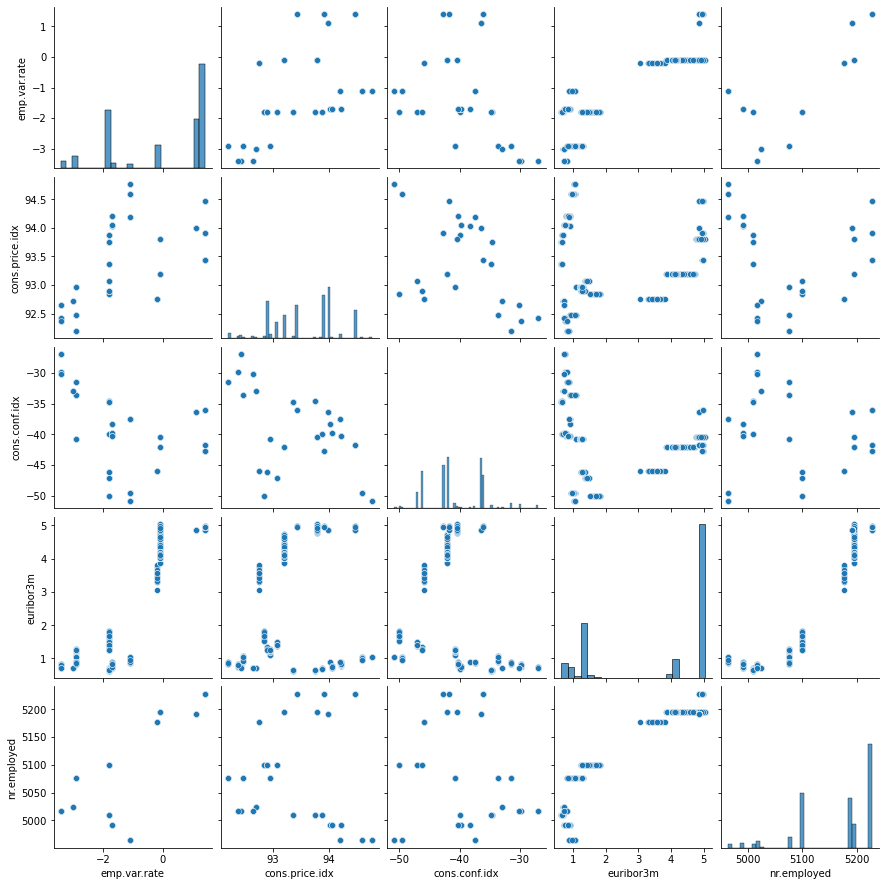

In [34]:
sns.pairplot(continuous_data.iloc[:,2:])

# Correlation for independent continuous data

In [35]:
corr=continuous_data.corr()
corr

,age,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
emp.var.rate,-0.000371,-0.027968,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.906970,0.522034,0.100513,0.945154,1.000000


Text(0.5, 1.0, 'Correlation Plot')

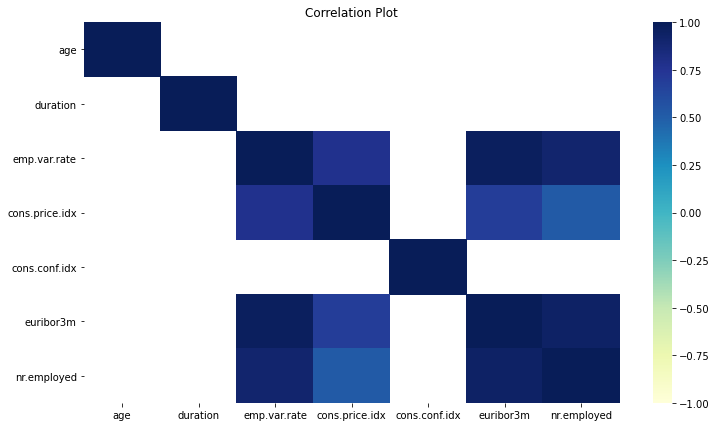

In [36]:
plt.figure(figsize=(12, 7))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],cmap='YlGnBu', vmax=1.0, vmin=-1.0)
plt.title('Correlation Plot')

In [37]:
vif=pd.DataFrame()
for i,j in enumerate(continuous_data.columns):    
    vif_value = variance_inflation_factor(continuous_data.values,i)
    vif=vif.append({"variable":j,"vif_value":vif_value},ignore_index=True)
vif

,variable,vif_value
0,age,16.039684
1,duration,1.998911
2,emp.var.rate,28.708187
3,cons.price.idx,21453.288206
4,cons.conf.idx,117.964486
5,euribor3m,224.758340
6,nr.employed,25514.005785


From the above results there is Multi-Collinearity between independent continuous data

In [38]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32226,45,technician,single,university.degree,no,no,no,cellular,may,fri,763,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
11655,43,technician,married,basic.9y,unknown,yes,yes,telephone,jun,fri,818,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
6193,22,admin.,married,high.school,no,no,no,telephone,may,tue,240,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7274,41,blue-collar,married,professional.course,no,no,no,telephone,may,thu,53,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
22900,53,blue-collar,married,basic.6y,no,yes,no,cellular,aug,mon,64,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34350,24,blue-collar,single,basic.9y,no,no,yes,cellular,may,thu,51,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1
22365,50,admin.,divorced,university.degree,no,yes,no,cellular,aug,thu,129,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
36483,28,admin.,single,high.school,no,no,no,cellular,jun,wed,198,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2
12987,27,admin.,single,professional.course,no,no,yes,cellular,jul,tue,518,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1


# Data Preprocessing

In [39]:
x.drop(columns=["duration","contact","month","day_of_week"],inplace=True)

In [40]:
label=LabelEncoder()
for i in ["job","marital","education","poutcome"]:
    x[i]=label.fit_transform(x[i])

In [41]:
x

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32226,45,9,2,6,no,no,no,1,999,0,1,-1.8,92.893,-46.2,1.313,5099.1
11655,43,9,1,2,unknown,yes,yes,2,999,0,1,1.4,94.465,-41.8,4.959,5228.1
6193,22,0,1,3,no,no,no,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
7274,41,1,1,5,no,no,no,3,999,0,1,1.1,93.994,-36.4,4.860,5191.0
22900,53,1,1,1,no,yes,no,5,999,0,1,1.4,93.444,-36.1,4.965,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34350,24,1,2,2,no,no,yes,1,999,1,0,-1.8,92.893,-46.2,1.266,5099.1
22365,50,0,0,6,no,yes,no,3,999,0,1,1.4,93.444,-36.1,4.963,5228.1
36483,28,0,2,3,no,no,no,1,999,0,1,-2.9,92.963,-40.8,1.260,5076.2
12987,27,0,2,5,no,no,yes,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1


In [42]:
get_dummy=x.loc[:,["default","housing","loan"]]
dummy_data=pd.get_dummies(get_dummy,drop_first=True)

In [43]:
dummy_data

,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
32226,0,0,0,0,0,0
11655,1,0,0,1,0,1
6193,0,0,0,0,0,0
7274,0,0,0,0,0,0
22900,0,0,0,1,0,0
...,...,...,...,...,...,...
34350,0,0,0,0,0,1
22365,0,0,0,1,0,0
36483,0,0,0,0,0,0
12987,0,0,0,0,0,1


In [44]:
x.drop(columns=["default","housing","loan"],inplace=True)

In [45]:
x=x.join(dummy_data)

In [46]:
x

,age,job,marital,education,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
32226,45,9,2,6,1,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0,0,0,0,0,0
11655,43,9,1,2,2,999,0,1,1.4,94.465,-41.8,4.959,5228.1,1,0,0,1,0,1
6193,22,0,1,3,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0
7274,41,1,1,5,3,999,0,1,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,0,0
22900,53,1,1,1,5,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34350,24,1,2,2,1,999,1,0,-1.8,92.893,-46.2,1.266,5099.1,0,0,0,0,0,1
22365,50,0,0,6,3,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0,0,0,1,0,0
36483,28,0,2,3,1,999,0,1,-2.9,92.963,-40.8,1.260,5076.2,0,0,0,0,0,0
12987,27,0,2,5,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,1


In [47]:
y

32226    0
11655    0
6193     0
7274     0
22900    0
        ..
34350    0
22365    0
36483    1
12987    0
15013    0
Name: y, Length: 41188, dtype: int64

# Feature Importance using Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf=RandomForestClassifier().fit(x,y)

In [50]:
rf.feature_importances_*100

array([2.09636268e+01, 9.04132260e+00, 3.92928749e+00, 7.84774247e+00,
       9.08312813e+00, 4.24899098e+00, 1.85482678e+00, 2.99926755e+00,
       2.26281851e+00, 2.65740162e+00, 2.88907030e+00, 1.84485177e+01,
       5.97315851e+00, 1.34767862e+00, 4.60891195e-05, 2.99508259e-01,
       3.50236571e+00, 3.38993496e-01, 2.31224834e+00])

In [51]:
pd.DataFrame(rf.feature_importances_*100,x.columns,columns=["Value"])>5

,Value
age,True
job,True
marital,False
education,True
campaign,True
pdays,False
previous,False
poutcome,False
emp.var.rate,False
cons.price.idx,False


Important features derived from Random Forest having the value more than 5 :  

age   
job  
education  
duration (As the description said, duration is most influencing variable) 
campaign     
euribor3m    
nr.employed 

# Logistic Regression

In [52]:
def logistic_regression(x,y):    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    scale=MinMaxScaler()
    scale.fit(x_train)
    x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scale.transform(x_test),columns=x_test.columns)
    x_train,y_train=SMOTE().fit_resample(x_train,y_train)
    logi = LogisticRegression(solver="liblinear",max_iter=1000,n_jobs=3)
    logi.fit(x_train,y_train)
    predict_test=logi.predict(x_test)
    predict_train=logi.predict(x_train)
    logi_Accuracy_test=accuracy_score(y_test,predict_test)
    logi_Accuracy_train=accuracy_score(y_train,predict_train)
    logi_cohen_kappa=cohen_kappa_score(y_test,predict_test)
    logi_recall=recall_score(y_test,predict_test)
    print("solver, ",i,": ","Train : ",logi_Accuracy_train*100,"Test : ",logi_Accuracy_test*100)
    print("\nTrain Classification Report \n ",classification_report(y_train,predict_train))
    print("\nTest Classification Report \n",classification_report(y_test,predict_test))
    print("\nCohen's Kappa Score : ",logi_cohen_kappa)
    print("\nConfussion Matrix \n",confusion_matrix(y_test,predict_test))
    pred_prob=logi.predict_proba(x_test)[:,1]
    fpr,tpr,threshold=roc_curve(y_test,pred_prob)
    logi_auc_score = roc_auc_score(y_test, predict_test)
    print("\nauc_score",logi_auc_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--',label='Logistic Regression (area = %0.2f)' % logi_auc_score)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    logi_model="Logistic_Regression"
    return logi_model,logi_Accuracy_test,logi_Accuracy_train,logi_cohen_kappa,logi_recall,logi_auc_score 

solver,  poutcome :  Train :  72.76997142745313 Test :  77.72922230314802

Train Classification Report 
                precision    recall  f1-score   support

           0       0.70      0.79      0.74     25549
           1       0.76      0.67      0.71     25549

    accuracy                           0.73     51098
   macro avg       0.73      0.73      0.73     51098
weighted avg       0.73      0.73      0.73     51098


Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.79      0.86     10999
           1       0.28      0.68      0.40      1358

    accuracy                           0.78     12357
   macro avg       0.62      0.73      0.63     12357
weighted avg       0.88      0.78      0.81     12357


Cohen's Kappa Score :  0.29093816070959433

Confussion Matrix 
 [[8685 2314]
 [ 438  920]]

auc_score 0.7335420504822971


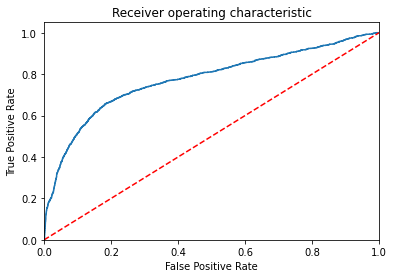

In [53]:
logi_model,logi_Accuracy_test,logi_Accuracy_train,logi_cohen_kappa,logi_recall,logi_auc_score=logistic_regression(x,y)

# K-Nearest Neighbour 

In [54]:
def knn(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    scale=MinMaxScaler()
    scale.fit(x_train)
    x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scale.transform(x_test),columns=x_test.columns)
    x_train,y_train=SMOTE().fit_resample(x_train,y_train)
    estimator=KNeighborsClassifier()
    param={"n_neighbors":[4,5],"algorithm":['ball_tree', 'kd_tree'],"leaf_size":[5,10],"p":[1,2]}
    grid=GridSearchCV(estimator=estimator,param_grid=param,n_jobs=-1,cv=5,scoring='recall',verbose=3)
    grid.fit(x_train,y_train)
    print(grid.best_score_)
    print(grid.best_params_)
    best_param=grid.best_params_
    knn=KNeighborsClassifier(n_neighbors=best_param["n_neighbors"],algorithm=best_param["algorithm"]
                    ,leaf_size=best_param["leaf_size"],p=best_param["p"],n_jobs=-1)
    knn.fit(x_train,y_train)
    predict_test=knn.predict(x_test)
    predict_train=knn.predict(x_train)
    knn_Accuracy_test=accuracy_score(y_test,predict_test)
    knn_Accuracy_train=accuracy_score(y_train,predict_train)
    knn_cohen_kappa=cohen_kappa_score(y_test,predict_test)
    knn_recall=recall_score(y_test,predict_test)
    print("Train : ",knn_Accuracy_train*100,"Test : ",knn_Accuracy_test*100)
    print("\nTrain Classification Report \n ",classification_report(y_train,predict_train))
    print("\nTest Classification Report \n",classification_report(y_test,predict_test))
    pred_prob=knn.predict_proba(x_test)[:,1]
    fpr,tpr,throshold=roc_curve(y_test,pred_prob)
    knn_auc_score = roc_auc_score(y_test, predict_test)
    print("\nCohen's Kappa Score : ",knn_cohen_kappa)
    print("\nConfussion Matrix \n",confusion_matrix(y_test,predict_test))
    print("auc_score",knn_auc_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--',label='K-Nearest Neighbour (area = %0.2f)' % knn_auc_score)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    knn_model="K-Nearest_Neighbour"
    return knn_model,knn_Accuracy_test,knn_Accuracy_train,knn_cohen_kappa,knn_recall,knn_auc_score 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.0min finished


0.9230109713911867
{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 5, 'p': 2}
Train :  90.93115190418412 Test :  76.67718701950311

Train Classification Report 
                precision    recall  f1-score   support

           0       0.96      0.86      0.90     25549
           1       0.87      0.96      0.91     25549

    accuracy                           0.91     51098
   macro avg       0.91      0.91      0.91     51098
weighted avg       0.91      0.91      0.91     51098


Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.79      0.86     10999
           1       0.25      0.55      0.34      1358

    accuracy                           0.77     12357
   macro avg       0.59      0.67      0.60     12357
weighted avg       0.86      0.77      0.80     12357


Cohen's Kappa Score :  0.2243892029751432

Confussion Matrix 
 [[8726 2273]
 [ 609  749]]
auc_score 0.6724456206421765


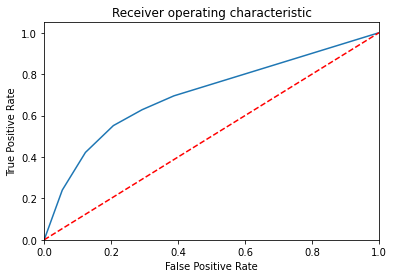

In [55]:
knn_model,knn_Accuracy_test,knn_Accuracy_train,knn_cohen_kappa,knn_recall,knn_auc_score=knn(x,y)

# Naive Bayes

In [56]:
def naive_bayes(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    scale=MinMaxScaler()
    scale.fit(x_train)
    x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scale.transform(x_test),columns=x_test.columns)
    x_train,y_train=SMOTE().fit_resample(x_train,y_train)
    naive=GaussianNB()
    naive.fit(x_train,y_train)
    predict_test=naive.predict(x_test)
    predict_train=naive.predict(x_train)
    naive_Accuracy_test=accuracy_score(y_test,predict_test)
    naive_Accuracy_train=accuracy_score(y_train,predict_train)
    naive_cohen_kappa=cohen_kappa_score(y_test,predict_test)
    naive_recall=recall_score(y_test,predict_test)
    print("Train : ",naive_Accuracy_train*100,"Test : ",naive_Accuracy_test*100)
    print("\nTrain Classification Report \n ",classification_report(y_train,predict_train))
    print("\nTest Classification Report \n",classification_report(y_test,predict_test))
    pred_prob=naive.predict_proba(x_test)[:,1]
    fpr,tpr,throshold=roc_curve(y_test,pred_prob)
    naive_auc_score = roc_auc_score(y_test, predict_test)
    print("\nCohen's Kappa Score : ",naive_cohen_kappa)
    print("\nConfussion Matrix \n",confusion_matrix(y_test,predict_test))
    print("auc_score",naive_auc_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--',label='Naive Bayes (area = %0.2f)' % naive_auc_score)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    naive_model="Naive_Bayes"
    return naive_model,naive_Accuracy_test,naive_Accuracy_train,naive_cohen_kappa,naive_recall,naive_auc_score

Train :  58.92598536146229 Test :  35.3402929513636

Train Classification Report 
                precision    recall  f1-score   support

           0       0.73      0.28      0.41     25549
           1       0.56      0.90      0.69     25549

    accuracy                           0.59     51098
   macro avg       0.64      0.59      0.55     51098
weighted avg       0.64      0.59      0.55     51098


Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.29      0.44     10999
           1       0.13      0.90      0.23      1358

    accuracy                           0.35     12357
   macro avg       0.55      0.59      0.34     12357
weighted avg       0.87      0.35      0.42     12357


Cohen's Kappa Score :  0.05357168156780889

Confussion Matrix 
 [[3143 7856]
 [ 134 1224]]
auc_score 0.5935393644702738


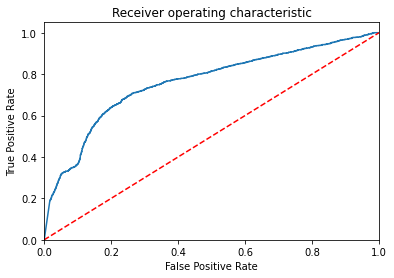

In [57]:
naive_model,naive_Accuracy_test,naive_Accuracy_train,naive_cohen_kappa,naive_recall,naive_auc_score=naive_bayes(x,y)

# XG Boost

In [58]:
def xgboost(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    x_train,y_train=SMOTE().fit_resample(x_train,y_train)
    estimator=XGBClassifier()
    param = {
    "n_estimators": [50,150,200],"max_depth":[4,6,8],"learning_rate":[0.05,0.1,0.4],"min_child_weight":[4,6,8],
        "booster":["gbtree"],"base_score":[0.75,1],"subsample":[0.8]}
    grid=GridSearchCV(estimator=estimator,param_grid=param,n_jobs=-1,cv=5,scoring='recall',verbose=3)
    grid.fit(x_train,y_train)
    print(grid.best_score_)
    print(grid.best_params_)
    best_param=grid.best_params_
    xgb=XGBClassifier(n_estimators=best_param["n_estimators"],max_depth=best_param["max_depth"]
                             ,learning_rate=best_param["learning_rate"],min_child_weight=best_param["min_child_weight"],
                             booster=best_param["booster"],base_score=best_param["base_score"]
                             ,subsample=best_param["subsample"],n_jobs=-1)
    xgb.fit(x_train,y_train)
    predict_test=xgb.predict(x_test)
    predict_train=xgb.predict(x_train)
    xgb_Accuracy_test=accuracy_score(y_test,predict_test)
    xgb_Accuracy_train=accuracy_score(y_train,predict_train)
    xgb_cohen_kappa=cohen_kappa_score(y_test,predict_test)
    xgb_recall=recall_score(y_test,predict_test)
    print("Train : ",xgb_Accuracy_train*100,"Test : ",xgb_Accuracy_test*100)
    print("\nTrain Classification Report \n ",classification_report(y_train,predict_train))
    print("\nTest Classification Report \n",classification_report(y_test,predict_test))
    pred_prob=xgb.predict_proba(x_test)[:,1]
    fpr,tpr,throshold=roc_curve(y_test,pred_prob)
    xgb_auc_score = roc_auc_score(y_test, predict_test)
    print("\nCohen's Kappa Score : ",xgb_cohen_kappa)
    print("\nConfussion Matrix \n",confusion_matrix(y_test,predict_test))
    print("auc_score",xgb_auc_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--',label='Xg Boost (area = %0.2f)' % xgb_auc_score)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    xgb_model="XG_Boost"
    return xgb_model,xgb_Accuracy_test,xgb_Accuracy_train,xgb_cohen_kappa,xgb_recall,xgb_auc_score

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 11.9min finished


0.9042654093788676
{'base_score': 0.75, 'booster': 'gbtree', 'learning_rate': 0.4, 'max_depth': 8, 'min_child_weight': 4, 'n_estimators': 200, 'subsample': 0.8}
Train :  96.76503972758229 Test :  87.53742817836044

Train Classification Report 
                precision    recall  f1-score   support

           0       0.95      0.98      0.97     25549
           1       0.98      0.95      0.97     25549

    accuracy                           0.97     51098
   macro avg       0.97      0.97      0.97     51098
weighted avg       0.97      0.97      0.97     51098


Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     10999
           1       0.42      0.35      0.38      1358

    accuracy                           0.88     12357
   macro avg       0.67      0.65      0.66     12357
weighted avg       0.87      0.88      0.87     12357


Cohen's Kappa Score :  0.3161984997731895

Confussion Matrix 
 [[1033

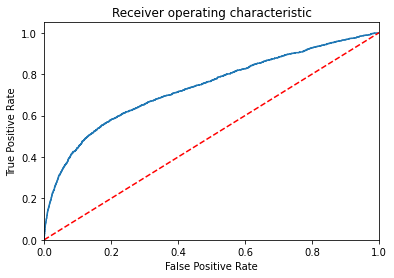

In [59]:
xgb_model,xgb_Accuracy_test,xgb_Accuracy_train,xgb_cohen_kappa,xgb_recall,xgb_auc_score=xgboost(x,y)

# Support Vector Machine

In [60]:
def svm(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    scale=MinMaxScaler()
    scale.fit(x_train)
    x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scale.transform(x_test),columns=x_test.columns)    
    estimator=SVC()
    param = {
    "gamma":[0.5,0.7,1],"C":[0.1,0.3,0.5],"kernel":['linear', 'rbf']}
    grid=GridSearchCV(estimator=estimator,param_grid=param,n_jobs=-1,cv=5,verbose=3)
    grid.fit(x_train,y_train)
    print(grid.best_score_)
    print(grid.best_params_)
    best_param=grid.best_params_
    svm=SVC(C=best_param["C"],gamma=best_param["gamma"]
                             ,kernel=best_param["kernel"],probability=True)
    svm.fit(x_train,y_train)
    predict_test=svm.predict(x_test)
    predict_train=svm.predict(x_train)
    svm_Accuracy_test=accuracy_score(y_test,predict_test)
    svm_Accuracy_train=accuracy_score(y_train,predict_train)
    svm_cohen_kappa=cohen_kappa_score(y_test,predict_test)
    svm_recall=recall_score(y_test,predict_test)
    print("Train : ",svm_Accuracy_train*100,"Test : ",svm_Accuracy_test*100)
    print("\nTrain Classification Report \n ",classification_report(y_train,predict_train))
    print("\nTest Classification Report \n",classification_report(y_test,predict_test))
    pred_prob=svm.predict_proba(x_test)[:,1]
    fpr,tpr,throshold=roc_curve(y_test,pred_prob)
    svm_auc_score = roc_auc_score(y_test, predict_test)
    print("\nCohen's Kappa Score : ",svm_cohen_kappa)
    print("\nConfussion Matrix \n",confusion_matrix(y_test,predict_test))
    print("auc_score",svm_auc_score)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1],'r--',label='SVM (area = %0.2f)' % svm_auc_score)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    svm_model="SVM"
    return svm_model,svm_Accuracy_test,svm_Accuracy_train,svm_cohen_kappa,svm_recall,svm_auc_score

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.1min finished


0.8989628696433913
{'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
Train :  90.06277964690784 Test :  89.84381322327425

Train Classification Report 
                precision    recall  f1-score   support

           0       0.91      0.99      0.95     25549
           1       0.73      0.20      0.32      3282

    accuracy                           0.90     28831
   macro avg       0.82      0.60      0.63     28831
weighted avg       0.89      0.90      0.87     28831


Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     10999
           1       0.65      0.17      0.26      1358

    accuracy                           0.90     12357
   macro avg       0.78      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357


Cohen's Kappa Score :  0.23019912868943793

Confussion Matrix 
 [[10876   123]
 [ 1132   226]]
auc_score 0.5776191864275786


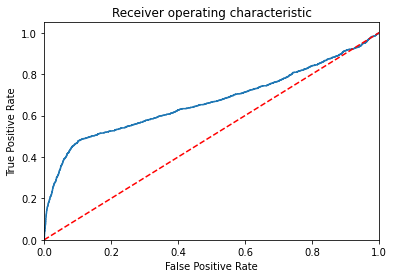

In [61]:
svm_model,svm_Accuracy_test,svm_Accuracy_train,svm_cohen_kappa,svm_recall,svm_auc_score=svm(x,y)

In [63]:
scores_table=pd.DataFrame(data={"Model":[logi_model,knn_model,naive_model,xgb_model,svm_model],
                   "Train_Accuracy":[logi_Accuracy_train,knn_Accuracy_train,naive_Accuracy_train,xgb_Accuracy_train,svm_Accuracy_train],
                   "Test_Accuracy":[logi_Accuracy_test,knn_Accuracy_test,naive_Accuracy_test,xgb_Accuracy_test,svm_Accuracy_test],
                   "Kappa_Score":[logi_cohen_kappa,knn_cohen_kappa,naive_cohen_kappa,xgb_cohen_kappa,svm_cohen_kappa],
                  "Recall_Score":[logi_recall,knn_recall,naive_recall,xgb_recall,svm_recall],
                  "Area_under_the_curve":[logi_auc_score,knn_auc_score,naive_auc_score,xgb_auc_score,svm_auc_score]})

In [64]:
scores_table

,Model,Train_Accuracy,Test_Accuracy,Kappa_Score,Recall_Score,Area_under_the_curve
0,Logistic_Regression,0.727700,0.777292,0.290938,0.677467,0.733542
1,K-Nearest_Neighbour,0.909312,0.766772,0.224389,0.551546,0.672446
2,Naive_Bayes,0.589260,0.353403,0.053572,0.901325,0.593539
3,XG_Boost,0.967650,0.875374,0.316198,0.354934,0.647282
4,SVM,0.900628,0.898438,0.230199,0.166421,0.577619


# Conclusion

In this given data, the output is either the customer subscribe the term deposit or not. 

So, True Positive Rate is important(Recall_score), and False Negative Rate should be minimized. As the given response variable is imbalanced, recall_score metrics is considered for model accuracy.

From comparing the above all models SVM accuracy score is better in Train and Test data compared to other models, but as we concerned to recall score Naive Bayes is performed better(recall_score : 90% Both Train_data & Test_data) with minimizing the False Negative rate.

So Naive Bayes is the best model for this data, with only 134 misclassification in False_negative